In [11]:
##Import libraries
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD

In [12]:
## Initialising the CNN
classifier = Sequential()

In [13]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Convolution2D(64,3,3,input_shape = (256,256,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Convolution2D(64,3,3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


## Add another layer
classifier.add(Convolution2D(64,3,3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(256, 256,..., activation="relu")`
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if sys.path[0] == '':


In [14]:
## Flattening
classifier.add(Flatten())

In [15]:
## Fully connected CNN, Hidden ANN and output layer
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True)

In [18]:
## Scaling test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
## Importing training data
train_set = train_datagen.flow_from_directory('data',
                                               target_size=(256, 256),
                                               batch_size=6,
                                               class_mode='binary')

Found 200 images belonging to 2 classes.


In [21]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=40,
        epochs=12)

Epoch 1/12
40/40 [==============================] - 67s 2s/step - loss: 0.5230 - acc: 0.7584
Epoch 2/12
40/40 [==============================] - 65s 2s/step - loss: 0.5539 - acc: 0.7376
Epoch 3/12
40/40 [==============================] - 64s 2s/step - loss: 0.3746 - acc: 0.8003
Epoch 4/12
40/40 [==============================] - 65s 2s/step - loss: 0.4433 - acc: 0.8333
Epoch 5/12
40/40 [==============================] - 64s 2s/step - loss: 0.4071 - acc: 0.8167
Epoch 6/12
40/40 [==============================] - 64s 2s/step - loss: 0.3506 - acc: 0.8583
Epoch 7/12
40/40 [==============================] - 65s 2s/step - loss: 0.3208 - acc: 0.8626
Epoch 8/12
40/40 [==============================] - 64s 2s/step - loss: 0.3972 - acc: 0.8333
Epoch 9/12
40/40 [==============================] - 64s 2s/step - loss: 0.3659 - acc: 0.8626
Epoch 10/12
40/40 [==============================] - 64s 2s/step - loss: 0.2665 - acc: 0.8918
Epoch 11/12
40/40 [==============================] - 63s 2s/step - lo

In [66]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('data\\Humans\\Humans45.jpg'
                           ,target_size =(256,256))


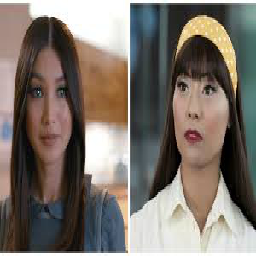

In [67]:
test_image

In [68]:
## Convert image to array
test_image = image.img_to_array(test_image)
## For single prediction change the dimension using axis. To remove problem of batch
test_image = np.expand_dims(test_image,axis = 0)
#Predicting the image using the loaded model
result = classifier.predict(test_image)

In [69]:
## Class of Monkey or Human

if result[0][0] == 1:
    prediction = 'Monkey'
else:
    prediction = 'Human'
prediction

'Human'